<a href="https://colab.research.google.com/github/ravindrabharathi/DL-Projects/blob/master/Dlib/Facial_Landmark_detection_and_Face_Alignment_using_Dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import dlib
import cv2
import numpy as np


In [34]:
import cv2
import numpy as np


def drawPolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im, [points], isClosed, (255, 200, 0), thickness=2, lineType=cv2.LINE_8)

# Use this function for 70-points facial landmark detector model
def renderFace(im, landmarks):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

# Use this function for any model other than
# 70 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [37]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [38]:
!cp '/gdrive/My Drive/dlib/shape_predictor_68_face_landmarks.zip' '.'

In [39]:
!unzip -uq "shape_predictor_68_face_landmarks.zip" 

In [40]:
!cp '/gdrive/My Drive/dlib/family.jpg' '.'

In [41]:
!cp '/gdrive/My Drive/dlib/face3.jpg' './face2.jpg'

In [42]:
!cp '/gdrive/My Drive/dlib/shape_predictor_5_face_landmarks.dat' '.'

In [43]:
!cp '/gdrive/My Drive/dlib/faceBlendCommon.py' '.'

In [44]:
import faceBlendCommon as fbc

In [45]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))

  f.close()

In [46]:
# Landmark model location
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
PREDICTOR_PATH2 = "shape_predictor_5_face_landmarks.dat"

In [47]:
# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

In [48]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# Read image
imageFilename = "family.jpg"
im= cv2.imread(imageFilename)

# landmarks will be stored in results/family_i.txt
landmarksBasename = "results_family"

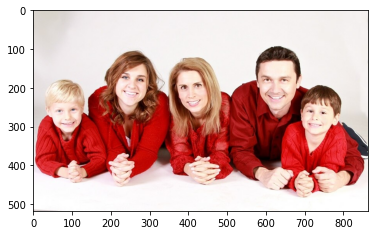

In [49]:
plt.imshow(im[:,:,::-1])
plt.show()

In [50]:
# Detect faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

# List to store landmarks of all detected faces
landmarksAll = []

Number of faces detected:  5


In [51]:
# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                          int(faceRects[i].top()),
                          int(faceRects[i].right()),
                          int(faceRects[i].bottom()))
  # For every face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, newRect)
  # Print number of landmarks
  if i==0:
    print("Number of landmarks",len(landmarks.parts()))

  # Store landmarks for current face
  landmarksAll.append(landmarks)

  # Next, we render the outline of the face using
  # detected landmarks.
  renderFace(im, landmarks)

  # The code below saves the landmarks to 
  # results/family_0.txt … results/family_4.txt.
  landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
  print("Saving landmarks to", landmarksFileName)
  # Write landmarks to disk
  writeLandmarksToFile(landmarks, landmarksFileName)

Number of landmarks 68
Saving landmarks to results_family_0.txt
Saving landmarks to results_family_1.txt
Saving landmarks to results_family_2.txt
Saving landmarks to results_family_3.txt
Saving landmarks to results_family_4.txt


In [52]:
outputFileName = "familyLandmarks.jpg"
print("Saving output image to", outputFileName)
cv2.imwrite(outputFileName, im)

Saving output image to familyLandmarks.jpg


True

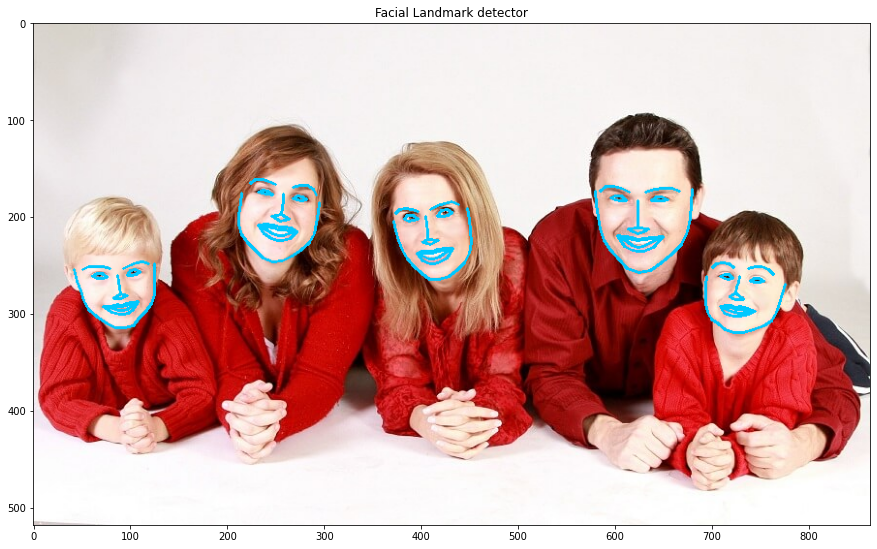

In [53]:
plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()

In [54]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH2)

In [55]:
# Read image
im = cv2.imread("face2.jpg")

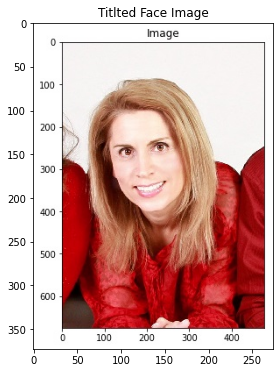

In [56]:
plt.imshow(im[:,:,::-1])
plt.title("Titlted Face Image")
plt.show()

In [57]:
# Detect landmarks.
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

In [58]:
points = np.array(points)

In [59]:
# Convert image to floating point in the range 0 to 1
im = np.float32(im)/255.0

In [60]:
# Dimensions of output image
h = 600
w = 600

In [61]:
# Normalize image to output coordinates.
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

In [62]:
imNorm = np.uint8(imNorm*255)

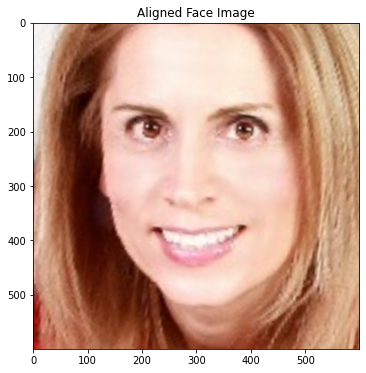

In [63]:
# Display the results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Face Image")
plt.show()